In [12]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

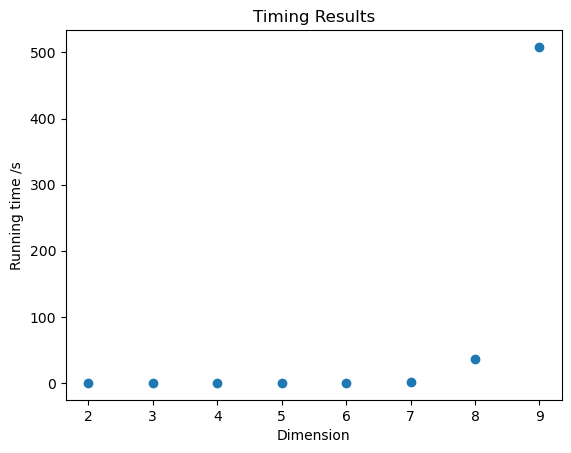

In [13]:
times = [0.006869586, 0.007213605, 0.008582439, 0.022113570, 0.153084177, 2.120082461, 36.332657187, 508.325154156]
dimensions = [i for i in range(2, 10)]
plt.scatter(dimensions, times) 
plt.ylabel("Running time /s")
plt.xlabel("Dimension")
plt.title("Timing Results")
plt.savefig('RTplot.pdf')
#plt.show()

In [14]:
# Plot average times for each dimension
sampleData = []
with open('/Users/user/CS_work/Prog_para/Systems/Sys_summ/code/sampleTime.txt', 'r') as sample:
    index = -1
    for line in sample:
        line = line.strip()
        if 'dimension' in line:
            index +=1 
            sampleData.append([])
        else:
            sampleData[index].append(float(line))

sampleDict = {
    'Dimension': dimensions, 
    'Average running time': [np.mean(dim) for dim in sampleData], 
    'Standard deviation': [np.std(dim) for dim in sampleData], 
    'Min': [min(dim) for dim in sampleData], 
    'Max': [max(dim) for dim in sampleData]
}


In [15]:
reduceData = []
with open('/Users/user/CS_work/Prog_para/Systems/Sys_summ/code/reduceTime.txt', 'r') as reduce:
    index = -1
    for line in reduce:
        line = line.strip()
        if 'dimension:' in line:
            index +=1 
            reduceData.append([])
        else: 
            reduceData[index].append(eval(line))

reduceDict = {
    'Dimension': dimensions, 
    'Average running time': [np.mean(dim) for dim in reduceData], 
    'Standard deviation': [np.std(dim) for dim in reduceData], 
    'Min': [min(dim) for dim in reduceData], 
    'Max': [max(dim) for dim in reduceData]
}

In [16]:
sampleDF = pd.DataFrame.from_dict(sampleDict)
reduceDF = pd.DataFrame.from_dict(reduceDict)

sampleDF.to_excel("sampleTimes.xlsx")
reduceDF.to_excel("reduceTimes.xlsx")